# Números Pseudo-Aleatorios
En esta entrada se discute la simulación de la variable aleatoria uniforme y se usa para aproximar áreas.

### Simular una v.a. $X \sim U(0,1)$

Siempre podemos generar un número aleatorio entre 0 y 1 pidiéndoselo a la computadora. Usaremos la librería $\texttt{random}$.

In [111]:
import random
import numpy as np
import matplotlib.pyplot as plt

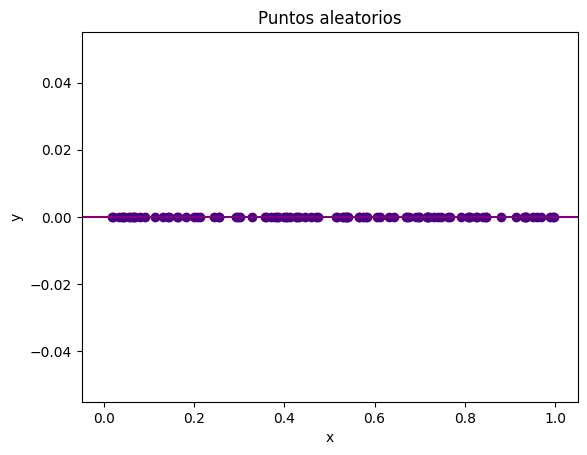

In [112]:
N = 100
xpoints = [random.random() for _ in range(N)]
ypoints = [random.random() for _ in range(N)]

plt.figure()
plt.scatter(xpoints, np.zeros(len(xpoints)), color = 'indigo')
plt.axline((0,0), (1,0), color = 'purple')
plt.title('Puntos aleatorios')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

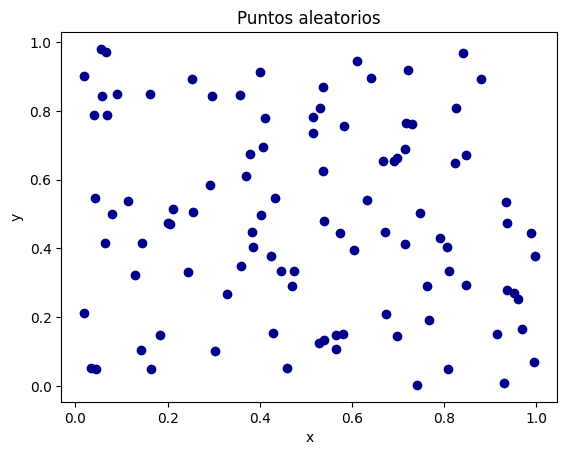

In [113]:
plt.figure()
plt.scatter(xpoints, ypoints, color = 'darkblue')
plt.title('Puntos aleatorios')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Ahora definimos una función para generar un gráfico como el anterior.

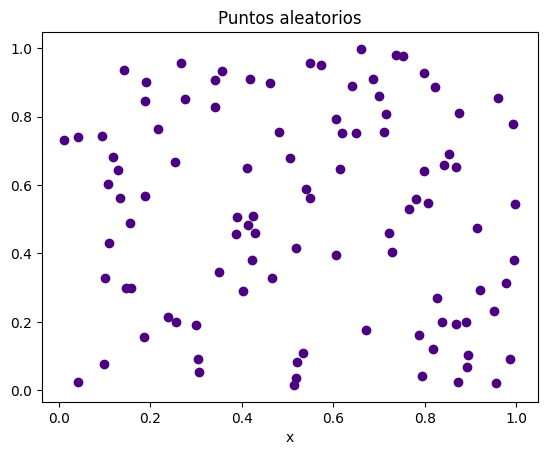

In [114]:
def plot_unif01(N, imp = True):
  xpoints = [random.random() for _ in range(N)]
  ypoints = [random.random() for _ in range(N)]

  plt.figure()
  plt.scatter(xpoints, ypoints, color = 'indigo')
  plt.title('Puntos aleatorios')
  plt.xlabel('x')

  if imp:
    return xpoints, ypoints
  else:
    return None

plot_unif01(100, False)

Cada vez que se ejecuta la celda, obtenemos diferentes puntos aleatorios.

### Simular una v.a. Uniforme$(a,b)$

**Pseudo-Código para simular una v.a. Uniforme$(a,b)$**

Nos interesa obtener un valor $Y \sim U(a,b)$.
1. Simulamos $X \sim U(0,1)$
2. Calculamos $Y = (b-a)X + a \sim U(a,b)$

Con esto podemos obtener muestras aleatorias de esta distribución.

In [115]:
a = 3
b = 8
X = random.random()
Y = (b-a)*X+a
Y

5.18680041439754

Ahora obtengamos una muestra y grafiquémosla

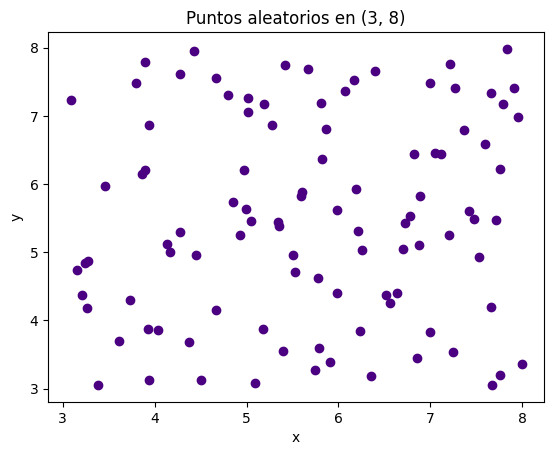

In [116]:
def simular_u01(N):
  return np.array([random.random() for _ in range(N)])

def simular_unif(a, b, N):
  X = simular_u01(N)
  return (b-a)*X + a

N = 100
xpoints2 = simular_unif(a, b, N)
ypoints2 = simular_unif(a, b, N)

plt.figure()
plt.scatter(xpoints2, ypoints2, color = 'indigo')
plt.title(f'Puntos aleatorios en {(a,b)}')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


### Método de Monte Carlo para aproximar áreas

**Pseudo-Código para aproximar un área usando el método de Monte Carlo**
Supongamos que tenemos un conjunto $A \subseteq \mathbb{R^2}$ con área tal que queremos aproximar.

1. Encontrar un conjunto de la forma $[a,b] \times [c,d]$ en donde $A$ esté acotado.
2. Generar dos muestras:
* $X_1, X_2, ..., X_N \sim U(a,b)$
* $Y_1, Y_2, ..., Y_N \sim U(c,d)$
3. Inicializamos una variable de conteo $\texttt{contador}$.
4. Para cada $j \in$ $\texttt{range(N)}$, si $(X_j, Y_j) \in A$, entonces $\texttt{contador = contador + 1}$. En caso contrario, continuamos.
5. La aproximación al área será $(b-a)(d-c)\frac{contador}{N}$.

Ejemplo

Supongamos que queremos aproximar el área del círculo unitario



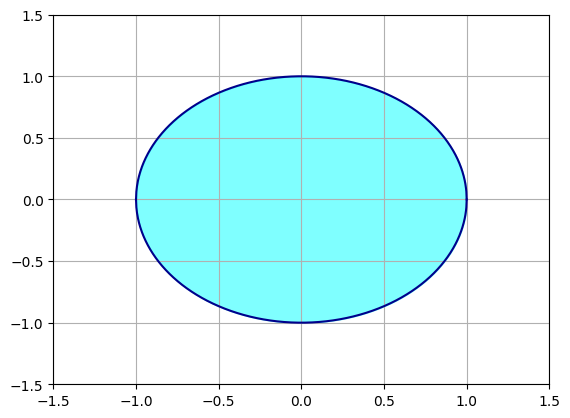

In [117]:
plt.plot(np.linspace(-1, 1, 1000), np.sqrt(1-np.linspace(-1, 1, 1000)**2), color = 'darkblue')
plt.plot(np.linspace(-1, 1, 1000), -np.sqrt(1-np.linspace(-1, 1, 1000)**2), color = 'darkblue')
plt.fill_between(np.linspace(-1, 1, 1000), -np.sqrt(1-np.linspace(-1, 1, 1000)**2), np.sqrt(1-np.linspace(-1, 1, 1000)**2), color='cyan', alpha=0.5)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.grid()
plt.show()



Ahora generamos números aleatorios en $[-1, 1]$

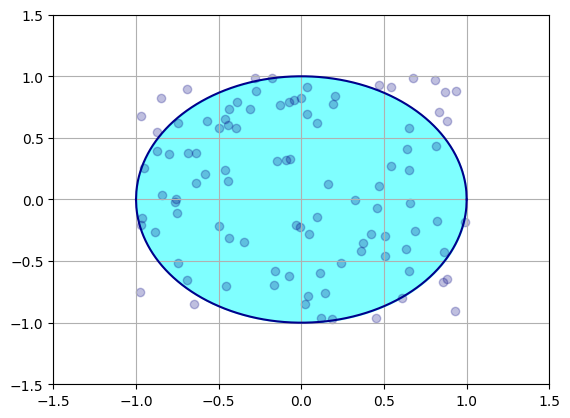

In [118]:
N = 100
xmuestra = simular_unif(-1, 1, N)
ymuestra = simular_unif(-1, 1, N)

plt.plot(np.linspace(-1, 1, 1000), np.sqrt(1-np.linspace(-1, 1, 1000)**2), color = 'darkblue')
plt.plot(np.linspace(-1, 1, 1000), -np.sqrt(1-np.linspace(-1, 1, 1000)**2), color = 'darkblue')
plt.fill_between(np.linspace(-1, 1, 1000), -np.sqrt(1-np.linspace(-1, 1, 1000)**2), np.sqrt(1-np.linspace(-1, 1, 1000)**2), color='cyan', alpha=0.5)
plt.scatter(xmuestra, ymuestra, color = 'navy', alpha = 0.25)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.grid()
plt.show()


Ahora aproximamos

In [119]:
contador = 0
for j in range(N):
  if xmuestra[j]**2 + ymuestra[j]**2 <= 1: # Condición de estar en el círculo
    contador = contador + 1

print(f'El área aproximada es {4*contador/N}')


El área aproximada es 3.12


Ahora definiremos una función que aproxime el área del círculo unitario ($\pi$) de esta forma

In [120]:
def aprox_pi(N):
  contador = 0
  x = simular_unif(-1, 1, N)
  y = simular_unif(-1, 1, N)
  for j in range(N):
    if x[j]**2 + y[j]**2 <= 1: # Condición de estar en el círculo
      contador = contador + 1
  return 4*contador/N

N = 100000
print(f'El área aproximada es {aprox_pi(N)}')

El área aproximada es 3.1404


¡Esto es muy útil para calcular áreas difíciles!